In [25]:
import pandas as pd
pd.options.display.max_columns = 100

In [26]:
muts_df = pd.read_pickle("./data/GYD_df.pkl")
muts_df.shape

(148, 45)

In [27]:
cond_cnt_d = {"none": 0}
feat_cnt = 0
for _, mut in muts_df.iterrows():
    for feat in mut["genomic features"]:
        feat_cnt += 1
        if len(feat["significantly associated conditions"]) > 0:
            for cond in feat["significantly associated conditions"]:
                if cond in cond_cnt_d.keys():                   
                    cond_cnt_d[cond] += 1
                else:
                    cond_cnt_d[cond] = 1
        else:
            cond_cnt_d["none"] += 1

cond_cnt_d

{'none': 72, 'glycerol(2.5)': 89, 'NaCl(0.5g/L) trace elements': 66}

,condition,mutated feature count,proportion
0,none,72.0,0.428571
1,glycerol(2.5),89.0,0.529762
2,NaCl(0.5g/L) trace elements,66.0,0.392857


Text(0.5, 0, 'mutated feature count')

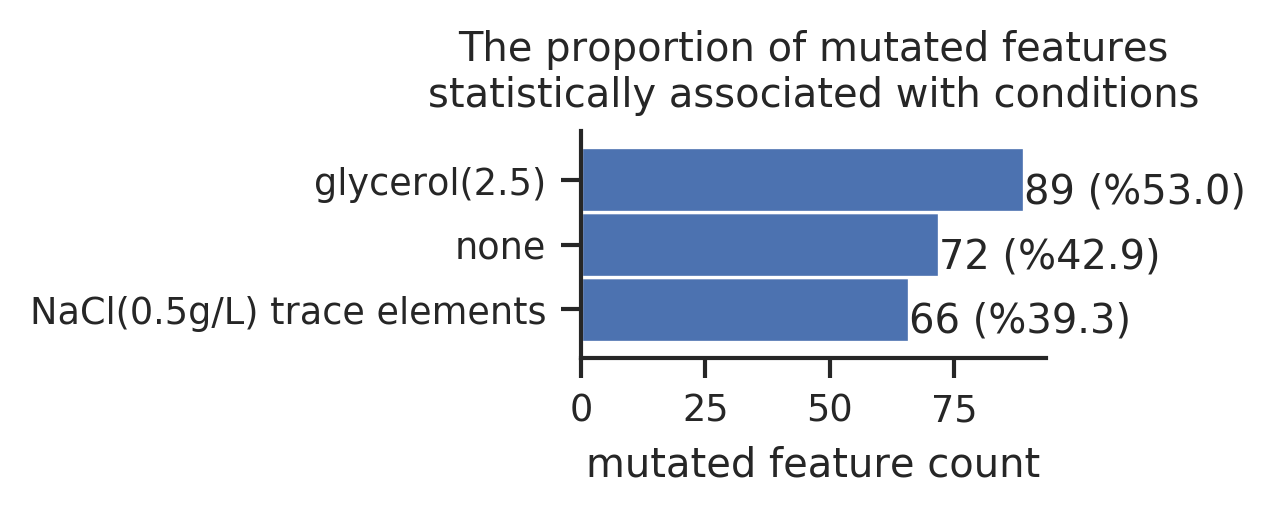

In [28]:
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams["figure.dpi"] = 300
sns.set_context("paper")
sns.set_style("ticks")

cond_cnt_df = pd.DataFrame()
for key, val in cond_cnt_d.items():
    cond_cnt_df = cond_cnt_df.append({"condition": key, "mutated feature count": val, "proportion":val/feat_cnt}, ignore_index=True)
display(cond_cnt_df)

cond_cnt_df = cond_cnt_df.sort_values(by="mutated feature count", ascending=True)

ax = cond_cnt_df.plot.barh(
    y="mutated feature count",
    x="condition",
    color="#4C72B0",
    figsize=(2,1),
    width=1
)

cond_cnt_df = cond_cnt_df.reset_index()  # Resetting index for the below annotations to work
for i, r in cond_cnt_df.iterrows(): 
    s = str(int(r["mutated feature count"])) +' (%{0:.1f})'.format(r["proportion"] * 100)
    ax.text(r["mutated feature count"], i-0.35,  s)
sns.despine(ax=ax, top=True, right=True)
ax.set_title("The proportion of mutated features\nstatistically associated with conditions")
ax.get_legend().remove()
sns.despine(ax=ax, top=True, right=True)
ax.set_ylabel('')
ax.set_xlabel("mutated feature count")

In [29]:
import pickle
f = open("./data/signif_genomic_feat_cond_json.pkl", 'rb')   
signif_genomic_feat_cond_json = pickle.load(f)
f.close()
signif_genomic_feat_cond_json[0:5]

[{'mutated features': 'ackA',
  'condition': 'Δpgi',
  'odd ratio': 19.76830318690784,
  'p value': 0.005611374257331419},
 {'mutated features': 'actP',
  'condition': 'D-lyxose',
  'odd ratio': 91.47619047619048,
  'p value': 0.0002902952921727443},
 {'mutated features': 'aldA TFBS',
  'condition': 'D-2-deoxyribose',
  'odd ratio': 11.347999005717126,
  'p value': 1.3022780635838894e-06},
 {'mutated features': 'araA',
  'condition': 'Δpts',
  'odd ratio': 101.02921840759679,
  'p value': 5.816691914618809e-06},
 {'mutated features': 'araC',
  'condition': 'D-arabinose',
  'odd ratio': 122.005291005291,
  'p value': 0.0001667390157604181}]

In [30]:
def get_mut_signif_conds(feat_name):
    signif_mut_conds = []
    for signif_mut_cond in signif_genomic_feat_cond_json:
        if signif_mut_cond['mutated features'] == feat_name:
            signif_mut_conds.append(signif_mut_cond)
    return signif_mut_conds
    
    

cond_mut_feat_assoc_df = pd.DataFrame()
for _, mut in muts_df.iterrows():
    for feat in mut["genomic features"]:
        signif_mut_conds = get_mut_signif_conds(feat["name"])
        for d in signif_mut_conds:
            cond_mut_feat_assoc_df = cond_mut_feat_assoc_df.append(d, ignore_index=True)

cond_mut_feat_assoc_df.head()

,condition,mutated features,odd ratio,p value
0,NaCl(0.5g/L) trace elements,cyaA,2.158561,5.283143e-04
1,glycerol(2.5),cyaA,26.112210,8.385766e-22
2,NaCl(0.5g/L) trace elements,glpK,2.162180,1.029164e-04
3,glucose(4) or glycerol(2.5),glpK,16.816514,1.037562e-03
4,glycerol(2.5),glpK,31.520690,2.287346e-32


In [31]:
test_df = cond_mut_feat_assoc_df.copy()
test_df = test_df.drop_duplicates()
print(len(test_df))
test_df = test_df[test_df["condition"]=="glycerol(2.5)"]
print(len(test_df))
test_df
# test_df.plot.bar(x="y="odd ratio")

53
15


,condition,mutated features,odd ratio,p value
1,glycerol(2.5),cyaA,26.112210,8.385766e-22
4,glycerol(2.5),glpK,31.520690,2.287346e-32
13,glycerol(2.5),hnsp,9.253680,1.162671e-03
15,glycerol(2.5),crr,19.854978,3.489679e-10
55,glycerol(2.5),mstA/C0614,29.535645,2.593840e-03
94,glycerol(2.5),glpFKX TFBS,29.535645,2.593840e-03
101,glycerol(2.5),leuLABCD attenuator terminator,21.669390,4.766970e-04
117,glycerol(2.5),hisLGDCBHAFI attenuator terminator,25.485022,2.913909e-07
119,glycerol(2.5),metY-rimP-nusA-infB-rbfA-truB-rpsO-pnp attenua...,29.535645,2.593840e-03
170,glycerol(2.5),fimZ,29.535645,2.593840e-03


In [32]:
gyd_cond_mut_feat_assoc_df = cond_mut_feat_assoc_df[cond_mut_feat_assoc_df["condition"].isin(cond_cnt_d.keys())].copy()

cross_counts_df = pd.crosstab(
    gyd_cond_mut_feat_assoc_df["mutated features"],
    gyd_cond_mut_feat_assoc_df["condition"]
)

cross_counts_df

condition,NaCl(0.5g/L) trace elements,glycerol(2.5)
mutated features,,
crr,10,10
cyaA,21,21
fimZ,0,1
glpFKX TFBS,0,2
glpK,28,28
glxK/allE,0,2
hisLGDCBHAFI attenuator terminator,0,6
hnsp,0,4
leuLABCD attenuator terminator,0,3


In [33]:
bin_df = cross_counts_df.copy()
for ir, r in bin_df.iterrows():
    for ic, c in r.items():
        if bin_df.loc[ir, ic] > 0:
            bin_df.loc[ir, ic] = 1
display(bin_df)

condition,NaCl(0.5g/L) trace elements,glycerol(2.5)
mutated features,,
crr,1,1
cyaA,1,1
fimZ,0,1
glpFKX TFBS,0,1
glpK,1,1
glxK/allE,0,1
hisLGDCBHAFI attenuator terminator,0,1
hnsp,0,1
leuLABCD attenuator terminator,0,1


In [34]:
# only want to plot genomic targets that have significant convergences
# I only want to look at mutated targets that have significant convergence
signif_gen_targ_s = set()
for _, r in muts_df.iterrows():
    for f in r["genomic features"]:
        if f["significantly enriched"]:
            signif_gen_targ_s.add(f["name"])
signif_gen_targ_s

{'crr',
 'cyaA',
 'glpFKX TFBS',
 'glpK',
 'glxK/allE',
 'hisLGDCBHAFI attenuator terminator',
 'hnsp',
 'leuLABCD attenuator terminator',
 'metY-rimP-nusA-infB-rbfA-truB-rpsO-pnp attenuator terminator',
 'mstA/C0614',
 'opgGH terminator',
 'rpoB',
 'rpsMKD-rpoA-rplQ terminator',
 'yceK attenuator terminator',
 'yhdNp'}

In [35]:
odds_df = bin_df.copy()
for feat, r in bin_df.iterrows():
    for cond, c in r.items():
        if bin_df.loc[feat, cond] > 0:
            odd_ratio = 0
            df = cond_mut_feat_assoc_df[
                (cond_mut_feat_assoc_df["condition"]==cond)
                & (cond_mut_feat_assoc_df["mutated features"]==feat)]["odd ratio"]
            if len(df):
                odd_ratio = df.unique()
            odds_df.loc[feat, cond] = odd_ratio
            
odds_df = odds_df[odds_df.index.isin(signif_gen_targ_s)]
# odds_df.index = '*'+odds_df.index
odds_df

condition,NaCl(0.5g/L) trace elements,glycerol(2.5)
mutated features,,
crr,2.152919,19.854978
cyaA,2.158561,26.112210
glpFKX TFBS,0.000000,29.535645
glpK,2.162180,31.520690
glxK/allE,0.000000,29.535645
hisLGDCBHAFI attenuator terminator,0.000000,25.485022
hnsp,0.000000,9.253680
leuLABCD attenuator terminator,0.000000,21.669390
metY-rimP-nusA-infB-rbfA-truB-rpsO-pnp attenuator terminator,0.000000,29.535645


In [36]:
import os, sys
module_path = os.path.abspath(os.path.join('..'))
if module_path not in sys.path:
    sys.path.append(module_path)
from util.metadata_categories_for_associations import METADATA_CATEGORIES_FOR_ASSOCIATIONS

exp_conds_df = muts_df[METADATA_CATEGORIES_FOR_ASSOCIATIONS].drop_duplicates()
exp_conds_df

,temperature,carbon-source,supplement,strain-description,taxonomy-id,base-media,nitrogen-source,phosphorous-source,sulfur-source,calcium-source
630,37 celsius,glycerol(2.5),NaCl(0.5g/L) trace elements,WT,511145,M9,NH4Cl(1),KH2PO4(3) Na2HPO4(6.8),MgSO4(0.24),CaCl2(0.1)


In [37]:
for i in exp_conds_df.columns:
    c = exp_conds_df.at[exp_conds_df.index[0], i]
    if c not in odds_df.columns:
        odds_df[c] = 0

odds_df

condition,NaCl(0.5g/L) trace elements,glycerol(2.5),37 celsius,WT,511145,M9,NH4Cl(1),KH2PO4(3) Na2HPO4(6.8),MgSO4(0.24),CaCl2(0.1)
mutated features,,,,,,,,,,
crr,2.152919,19.854978,0,0,0,0,0,0,0,0
cyaA,2.158561,26.112210,0,0,0,0,0,0,0,0
glpFKX TFBS,0.000000,29.535645,0,0,0,0,0,0,0,0
glpK,2.162180,31.520690,0,0,0,0,0,0,0,0
glxK/allE,0.000000,29.535645,0,0,0,0,0,0,0,0
hisLGDCBHAFI attenuator terminator,0.000000,25.485022,0,0,0,0,0,0,0,0
hnsp,0.000000,9.253680,0,0,0,0,0,0,0,0
leuLABCD attenuator terminator,0.000000,21.669390,0,0,0,0,0,0,0,0
metY-rimP-nusA-infB-rbfA-truB-rpsO-pnp attenuator terminator,0.000000,29.535645,0,0,0,0,0,0,0,0


In [38]:
odds_df.to_pickle("./data/GYD_key_geno_feat_assoc_odds.pkl")
odds_df

condition,NaCl(0.5g/L) trace elements,glycerol(2.5),37 celsius,WT,511145,M9,NH4Cl(1),KH2PO4(3) Na2HPO4(6.8),MgSO4(0.24),CaCl2(0.1)
mutated features,,,,,,,,,,
crr,2.152919,19.854978,0,0,0,0,0,0,0,0
cyaA,2.158561,26.112210,0,0,0,0,0,0,0,0
glpFKX TFBS,0.000000,29.535645,0,0,0,0,0,0,0,0
glpK,2.162180,31.520690,0,0,0,0,0,0,0,0
glxK/allE,0.000000,29.535645,0,0,0,0,0,0,0,0
hisLGDCBHAFI attenuator terminator,0.000000,25.485022,0,0,0,0,0,0,0,0
hnsp,0.000000,9.253680,0,0,0,0,0,0,0,0
leuLABCD attenuator terminator,0.000000,21.669390,0,0,0,0,0,0,0,0
metY-rimP-nusA-infB-rbfA-truB-rpsO-pnp attenuator terminator,0.000000,29.535645,0,0,0,0,0,0,0,0


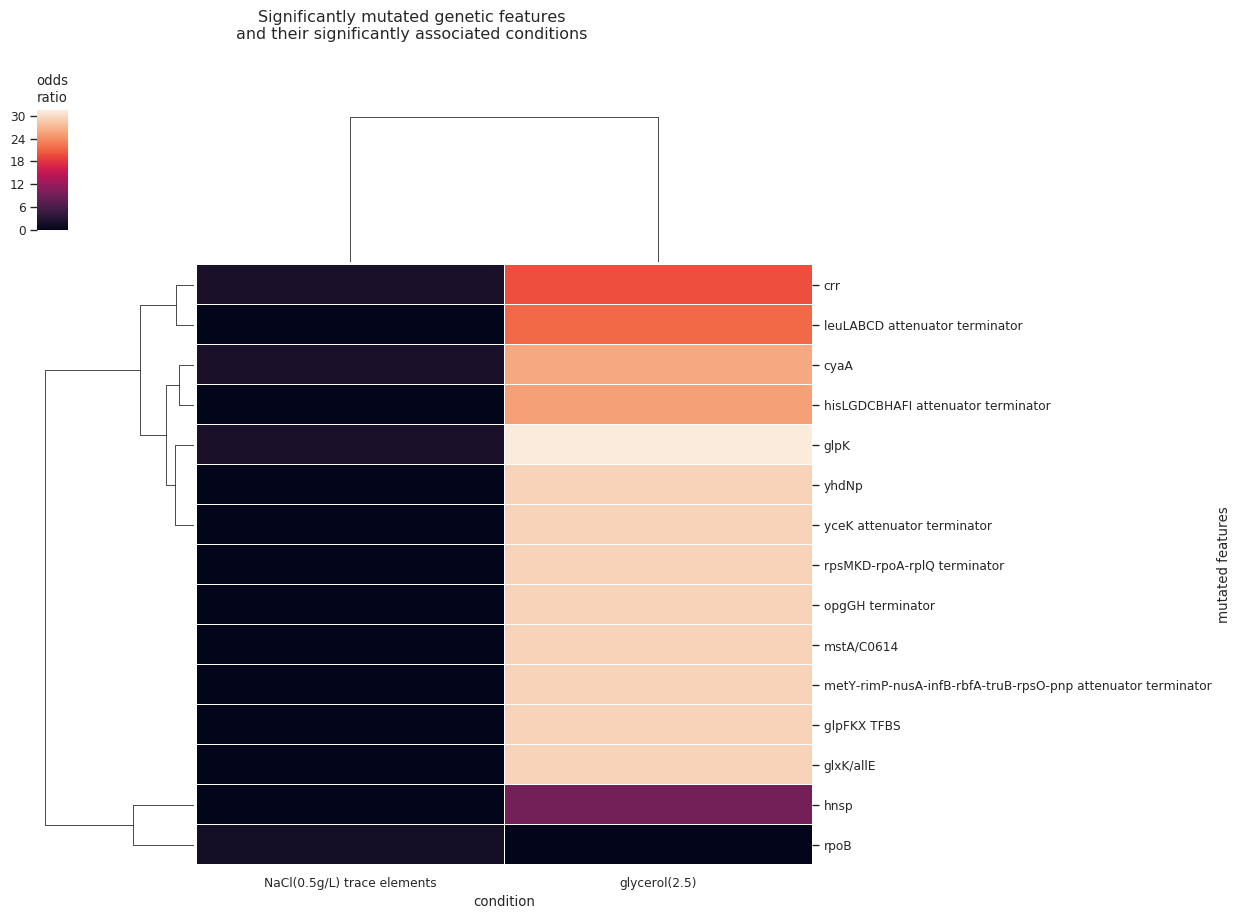

In [24]:
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams["figure.dpi"] = 100
sns.set_context("paper")
sns.set_style("white")

g = sns.clustermap(
    odds_df,
    linewidths=0.1,
#     cmap="coolwarm",
#     xticklabels=False,
#     yticklabels=False,
#     figsize=(2,4.5)
#     figsize=(4,2)
)

# Fix for recent matplotlib/seaborn issue
g.ax_heatmap.set_ylim(len(odds_df)+0, -0)

# g.cax.set_visible(False)
# g.ax_row_dendrogram.set_visible(False)
# g.ax_col_dendrogram.set_visible(False)
g.fig.suptitle("Significantly mutated genetic features\nand their significantly associated conditions")
g.cax.set_title("odds\nratio")
g.cax.yaxis.set_ticks_position("left")
# g.ax_heatmap.set_title(
#     "Overlap of associated conditions\nwith mutated genetic features",
# #     loc='top'
# )
# ax.yaxis.set_ticks_position('left')
# ax.yaxis.set_label_position("left")

# dendro_box = g.ax_row_dendrogram.get_position()
# dendro_box.x0-=0.2
# dendro_box.x1-=0.2
# g.cax.set_position(dendro_box)

# g.clustermap.set_xticklabels(g.get_xticklabels(), rotation=45, horizontalalignment='right')
# set_xticklabels(rotation=30)
# g.set_xticklabels(g.get_xticklabels(), rotation=45, horizontalalignment='right')
# plt.setp(g.ax_heatmap.get_xticklabels(), rotation=45)
plt.savefig("fig.svg", format="svg")

The clustermap generation code in the below cell won't execute if there is only one conditions being statistically associated to mutated features

In [ ]:
# plt.rcParams["figure.dpi"] = 300
# sns.set_context("paper")
# sns.set_style("whitegrid")

# from matplotlib.colors import LinearSegmentedColormap
# myColors = ('#FFFFFF', "#4C72B0")
# cmap = LinearSegmentedColormap.from_list('Custom', myColors, len(myColors))

# # pasted this from elsewhere. Don't know if it will automaticaly work
# df = bin_df.copy()
# df["mutated features"] = df["mutated features"].apply(lambda f: f.replace("attenuator terminator", "att term"))
# df["mutated features"] = df["mutated features"].apply(lambda f: f.replace("terminator", "term"))

# g = sns.clustermap(
#     df,
#     linewidths=0.1,
#     cmap=cmap,
# #     xticklabels=False,
# #     yticklabels=False,
#     figsize=(2,4.5)
# )
# g.cax.set_visible(False)
# g.ax_row_dendrogram.set_visible(False)
# g.ax_col_dendrogram.set_visible(False)
# ax = g.ax_heatmap
# g.ax_heatmap.set_title(
#     "Overlap of associated conditions\nwith mutated features",
#     loc='left'
# )
# # ax.yaxis.set_ticks_position('left')
# ax.yaxis.set_label_position("left")
# ax.set_xlabel('')
# # plt.title()

In [19]:
# Choosing to ignore the attenuator terminator
KEY_MUT_FEATS = ["glpK", "cyaA", "crr"]
display(
    len(KEY_MUT_FEATS),
    len(set(KEY_MUT_FEATS) & set(cond_mut_feat_assoc_df['mutated features'])),
    set(KEY_MUT_FEATS) - set(cond_mut_feat_assoc_df['mutated features'])
)

3

3

set()

In [20]:
key_mut_feat_df = cond_mut_feat_assoc_df[
    cond_mut_feat_assoc_df["mutated features"].isin(KEY_MUT_FEATS)
    & cond_mut_feat_assoc_df["condition"].isin(cond_cnt_d.keys())  # only considering conditions to local experiment
]
key_mut_feat_df = key_mut_feat_df.drop_duplicates()
key_mut_feat_df

,condition,mutated features,odd ratio,p value
0,NaCl(0.5g/L) trace elements,cyaA,2.158561,5.283143e-04
1,glycerol(2.5),cyaA,26.112210,8.385766e-22
2,NaCl(0.5g/L) trace elements,glpK,2.162180,1.029164e-04
4,glycerol(2.5),glpK,31.520690,2.287346e-32
14,NaCl(0.5g/L) trace elements,crr,2.152919,7.330096e-03
15,glycerol(2.5),crr,19.854978,3.489679e-10


In [21]:
gly_key_mut_feat_df = key_mut_feat_df[key_mut_feat_df.condition=="glycerol(2.5)"]
gly_key_mut_feat_df

,condition,mutated features,odd ratio,p value
1,glycerol(2.5),cyaA,26.112210,8.385766e-22
4,glycerol(2.5),glpK,31.520690,2.287346e-32
15,glycerol(2.5),crr,19.854978,3.489679e-10


In [22]:
# for some reason I have to do this up here and not in the below plotting cell.
gly_key_mut_feat_df = gly_key_mut_feat_df.sort_values("odd ratio")
gly_key_mut_feat_df

,condition,mutated features,odd ratio,p value
15,glycerol(2.5),crr,19.854978,3.489679e-10
1,glycerol(2.5),cyaA,26.112210,8.385766e-22
4,glycerol(2.5),glpK,31.520690,2.287346e-32


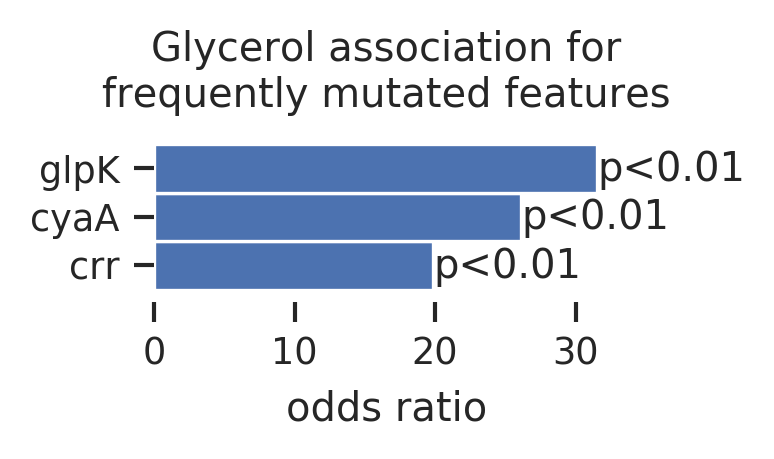

In [23]:
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams["figure.dpi"] = 300
sns.set_context("paper")
sns.set_style("ticks")


ax = gly_key_mut_feat_df.plot.barh(
    y="odd ratio",
    x="mutated features",
    color="#4C72B0",
    figsize=(2,0.75),
    width=1
)

gly_key_mut_feat_df = gly_key_mut_feat_df.reset_index()  # Resetting index for the below annotations to work
for i, r in gly_key_mut_feat_df.iterrows():
    s = int(r["odd ratio"])
#     ax.text(r["odd ratio"], i-0.25,  s)    
    s = ""
    if r["p value"] < 0.01: s = "p<0.01"
    else: s = "p=" + '{0:.3f}'.format(r["p value"])
    ax.text(r["odd ratio"], i-0.25,  s)
sns.despine(ax=ax, top=True, right=True, 
            bottom=True,
            left=True)
# ax.set_title("Mutated features\nassociated with L-serine and\nΔsdaA ΔsdaB ΔtdcG ΔglyA")
# ax.set_title("Mutated features\nassociated with glycerol")
# ax.set_title("Key mutation features\nassociated with glycerol")
ax.set_title("Glycerol association for\nfrequently mutated features")
ax.get_legend().remove()
ax.set_ylabel('')
ax.set_xlabel("odds ratio")
plt.savefig("fig.svg", format="svg")